# Приоритизация гипотез. A/B тестирование. #

**Вводные данные**

**Канал**: крупный интернет-магазина

**Проблема**: огромные вложения в рекламу, последние несколько месяцев компания терпит убытки

**Задача**: Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Часть 1. Приоритизация гипотез.

Какие гипотезы наиболее важны для проверки, какие из них мы будем проверять в первую очередь?

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задачи:

* [Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.](#chapter1)
* [Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.](#chapter2)
* [Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.](#chapter3)

# Часть 2. Анализ A/B-теста¶

Есть ли отличия между группами A и B? Есть ли смысл продолжать тестирование?

Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача
Проанализировать A/B-тест:
* [Построить график кумулятивной выручки по группам.](#chapter4)
* [Построить график кумулятивного среднего чека по группам.](#chapter5)
* [Построить график относительного изменения кумулятивного среднего чека группы B к группе A.](#chapter6)
* [Построить график кумулятивной конверсии по группам.](#chapter7)
* [Построить график относительного изменения кумулятивной конверсии группы B к группе A.](#chapter8)
* [Построить точечный график количества заказов по пользователям.](#chapter9)
* [Посчитать 95-й и 99-й процентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.](#chapter10)
* [Построить точечный график стоимостей заказов.](#chapter11)
* [Посчитать 95-й и 99-й процентили стоимости заказов. Выбрать границу для определения аномальных заказов.](#chapter12)
* [Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным.](#chapter13)
* [Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным](#chapter14)
* [Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным](#chapter15)
* [Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.](#chapter16)
* [Принять решение по результатам теста и объяснить его.](#chapter17)

# Описание данных

# Данные для первой части

Файл /datasets/hypothesis.csv.

**Hypothesis** — краткое описание гипотезы;

**Reach** — охват пользователей по 10-балльной шкале;

**Impact** — влияние на пользователей по 10-балльной шкале;

**Confidence** — уверенность в гипотезе по 10-балльной шкале;

**Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

# Данные для второй части

Файл /datasets/orders.csv.

**transactionId** — идентификатор заказа;

**visitorId** — идентификатор пользователя, совершившего заказ;

**date** — дата, когда был совершён заказ;

**revenue** — выручка заказа;

**group** — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.

**date** — дата;

**group** — группа A/B-теста;

**visitors** — количество пользователей в указанную дату в указанной группе A/B-теста

# Часть 1 

импортирование библиотек, загрузка данных, первое знакомство с данными

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters() 

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
#Функция получения первичной информации о датафрейме

def first_look (data):
    print('Первые 10 строк')
    display(data.head(10))
    print('Последние 10 строк')
    display(data.tail(10))
    print('Типы данных\n')
    display(data.info())
    print('Статистическая сводка')
    display(data.describe())
    print('Пропуски\n')
    display(data.isna().sum())
    print('\nПроцент пропусков от всего датасета')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('\nДубликаты\n')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [4]:
first_look(hypothesis)

Первые 10 строк


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Последние 10 строк


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Статистическая сводка


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


Пропуски



Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


Процент пропусков от всего датасета


Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64


Дубликаты

Дубликатов НЕТ


Можно заметить, что с данными все впорядке, нет пропусков, нет дубликатов, нужные значения в нужном типе данных, чтобы подготовиться к ответу на задачу, нужно:

1. Привести названия колонок к нижнему регистру
2. Прочитать полностью гипотезы

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()
pd.options.display.max_colwidth = 150
hypothesis.hypothesis

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

Провели предобработку данных, и познакомились с гипотезами, можно приступать к работе

# Приопитизация гипотез <a class="anchor" id="chapter1"></a>

Применение фреймворка ICE(от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)

In [6]:
# расчтаем по формуле (impact * confidense)/efforts 
hypothesis['ice_score'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'],2)
# выведем название гипотезы, остортиорованные по убываню ice_score
hypothesis[['hypothesis', 'ice_score']].sort_values(by='ice_score', ascending=False) 

,hypothesis,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


8 гипотеза набрала больше всего очков - "Запустить акцию, дающую скидку на товар в день рождения"

In [7]:
hypothesis.sort_values(by='ice_score', ascending=False)  

,hypothesis,reach,impact,confidence,efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Гипотеза заключающаяся в запуске акции, предоставляющей скидку на товар в день рождения клиента, имеет высокий потенциал влияния на удовлетворение клиентов и вызывает высокую уверенность в успешном результате. Люди обычно рады получать подарки, поэтому этот вид акции может быть особенно привлекателен.

Затраты на осуществление этой акции оцениваются как умеренные. Например, проведение рекламной кампании или добавление информационного баннера на сайт для информирования о акции не потребует значительных затрат.

# Примение фреймворка RICE <a class="anchor" id="chapter2"></a>
RICE (R от англ. reach, «охват»)

In [8]:
hypothesis['rice_score'] = hypothesis['ice_score']* hypothesis['reach'] 
hypothesis[['hypothesis', 'rice_score']].sort_values(by='rice_score', ascending=False) 

,hypothesis,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",39.99
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8.96
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3.99
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


При рассмотрении новой модификации метода, где учитывается охват пользователей, видно, что приоритетность гипотезы о скидке в день рождения снизилась. Это произошло из-за того, что показатель охвата (reach) для этой акции оказался всего лишь 1 балл. Это говорит о том, что предполагаемые изменения затронут самую маленькую группу пользователей. Действительно, каждый клиент сможет воспользоваться этой акцией лишь один раз в год, в свой день рождения.

Такое изменение в приоритизации позволяет более точно оценить планы и предполагаемые результаты акции. Важно учитывать не только потенциальный эффект и уверенность в успехе, но и охват аудитории, которую затронет предлагаемое изменение. Это помогает выстраивать более эффективные стратегии и акции, ориентированные на наибольшую группу пользователей, чтобы максимизировать положительные изменения и результаты.

In [9]:
hypothesis.sort_values(by='rice_score', ascending=False)  

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,39.99
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,8.96
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,3.99
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


Значительный отрыв по очкам имеет 7я гипотеза - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", для неё:

reach - 10 баллов. добавив форму подписки на все основные страницы - ни будет пропущен ни один пользователей, зашедший на сайт

impact - 7 баллов. форма с подпиской совершенно новое предстовление для пользвателей сервиса, он может существенно оказать влияние

сonfidence - 8 баллов. данная оценка была дана на основе данных эскпертов и нет никаких оснований ей не доверять,\

efforts - 5 баллов. средняя оценка, добавление небольшой формы на сайт не такая большая и сложная задача для разработчкиоы

# Выводы <a class="anchor" id="chapter3"></a>

Мы убедились в том, как работают методы приоритизации гипотез, такие как ICE и RICE, на примерах. Эти методы имеют похожую структуру, но приоритизация гипотез может значительно отличаться в зависимости от того, какой компонент учитывается более важным.

В обоих методах, таких как ICE и RICE, компоненты impact (воздействие), confidence (уверенность) и reach (охват) оцениваются прямопропорционально и добавляются к итоговой оценке гипотезы. Однако компонент efforts (затраты) действует обратнопропорционально: чем он меньше, тем лучше для приоритета гипотезы.

RICE включает дополнительный компонент - reach (охват), который учитывает, сколько пользователей затронет предполагаемое изменение. Этот компонент особенно важен, если целью является охват максимально большой аудитории.

В данном контексте выбор между методами ICE и RICE зависит от того, насколько важен охват пользователей для оценки гипотезы. Если мы стремимся выбрать гипотезу с максимальным охватом аудитории, то предпочтение отдается методу RICE. В то время как метод ICE может быть более предпочтителен, если у нас нет достаточных данных или возможности объективно оценить компонент reach для каждой гипотезы.

В контексте проведения A/B теста, мы рассматриваем гипотезу №7 о добавлении формы подписки на все основные страницы для сбора базы клиентов для email-рассылок. Эта гипотеза имеет необходимую оценку и доступные ресурсы для проведения тестирования, что делает ее привлекательным выбором для дальнейшего исследования и реализации.

По фреймворку ICE наиболее приоритетными были гипотезы:

Запустить акцию, дающую скидку на товар в день рождения

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

А по фреймворку RICE наиболее приоритетные гипотезы расположились следующим образом:

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Это произошло потому что фреймворк RICE учитывает параметр Reach (скольких пользователей затронет изменение, которое вы хотите внести), и в лидеры вышли гипотезы с наибольшим охватом пользователей

# Часть 2. Анализ A/B теста.

**Загрузка, предобработка и знакомство с данными**

In [10]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [11]:
first_look(orders)

Первые 10 строк


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Последние 10 строк


,transactionId,visitorId,date,revenue,group
1187,2274188238,132143192,2019-08-14,750,A
1188,1692103379,1022829655,2019-08-14,112,A
1189,4082620617,393266494,2019-08-14,31550,B
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


Типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

Статистическая сводка


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Пропуски



transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


Процент пропусков от всего датасета


transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64


Дубликаты

Дубликатов НЕТ


Проверим, есть ли пользователи, оказавшиеся в двух группах одновременно:

In [12]:
# Группировка данных по visitorid и подсчет уникальных групп для каждого пользователя
user_group_counts = orders.groupby('visitorId')['group'].nunique()

# Фильтрация пользователей, у которых количество уникальных групп больше 1
users_in_multiple_groups = user_group_counts[user_group_counts > 1].index.tolist()

# Вывод пользователей, попавших в несколько групп
print("Пользователи в нескольких группах:", users_in_multiple_groups, "Число этих пользователей:", len(users_in_multiple_groups))

Пользователи в нескольких группах: [8300375, 199603092, 232979603, 237748145, 276558944, 351125977, 393266494, 457167155, 471551937, 477780734, 818047933, 963407295, 1230306981, 1294878855, 1316129916, 1333886533, 1404934699, 1602967004, 1614305549, 1648269707, 1668030113, 1738359350, 1801183820, 1959144690, 2038680547, 2044997962, 2378935119, 2458001652, 2579882178, 2587333274, 2600415354, 2654030115, 2686716486, 2712142231, 2716752286, 2780786433, 2927087541, 2949041841, 2954449915, 3062433592, 3202540741, 3234906277, 3656415546, 3717692402, 3766097110, 3803269165, 3891541246, 3941795274, 3951559397, 3957174400, 3963646447, 3972127743, 3984495233, 4069496402, 4120364173, 4186807279, 4256040402, 4266935830] Число этих пользователей: 58


Удалим из датафрейма строки с этими пользователями, так как они будут искажать результаты A/B тестирования

In [13]:
orders = orders[~orders['visitorId'].isin(users_in_multiple_groups)]

Есть нарушение в стиле столбцов, а также формат даты был определён не корректно.

In [14]:
first_look(visitors)

Первые 10 строк


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Последние 10 строк


,date,group,visitors
52,2019-08-22,B,650
53,2019-08-23,B,546
54,2019-08-24,B,378
55,2019-08-25,B,679
56,2019-08-26,B,676
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


Типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Статистическая сводка


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Пропуски



date        0
group       0
visitors    0
dtype: int64


Процент пропусков от всего датасета


date        0.0
group       0.0
visitors    0.0
dtype: float64


Дубликаты

Дубликатов НЕТ


Нарушений в стиле нет, формат даты, также был опредёлен не верно. 
Исправим отмеченные ошибки, и проверим неявные дубликаты

In [15]:
#приведём к нижнему регистру и добавим нужнее подчёркивание для удобства чтения
orders.columns = orders.columns.str.replace('Id', '_id') 
#приведём столбцы с датой к типу datetime
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d') 
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d') 

In [16]:
print('Значения в "orders":')
print(orders['group'].unique())
print('Значения в "visitors":')
print(visitors['group'].unique())

Значения в "orders":
['B' 'A']
Значения в "visitors":
['A' 'B']


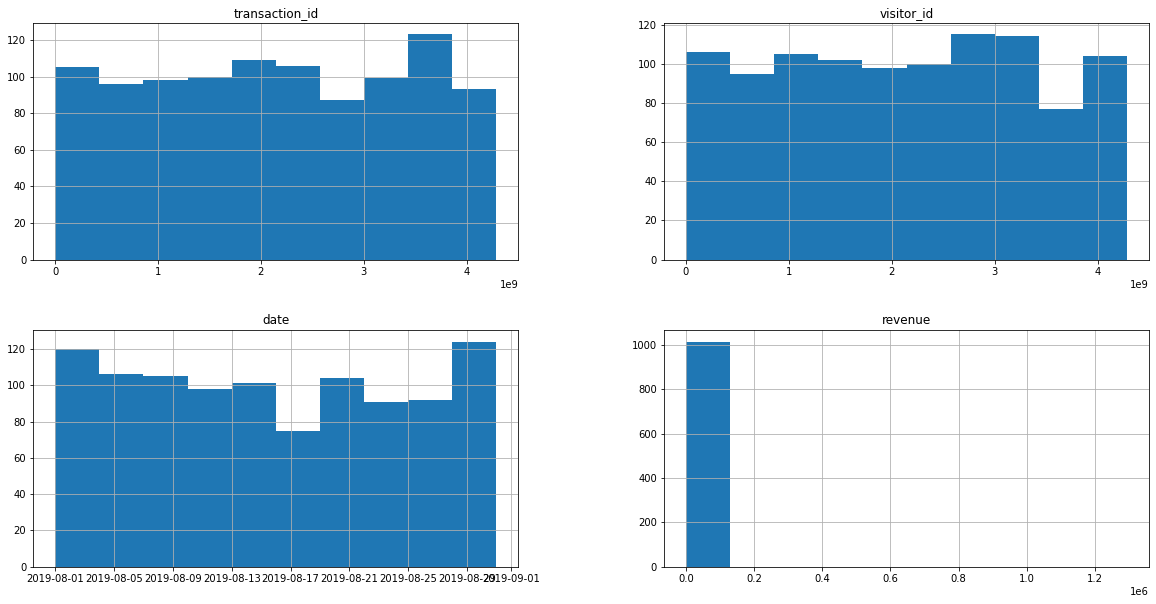

In [17]:
orders.hist(figsize=(20, 10))
plt.show()

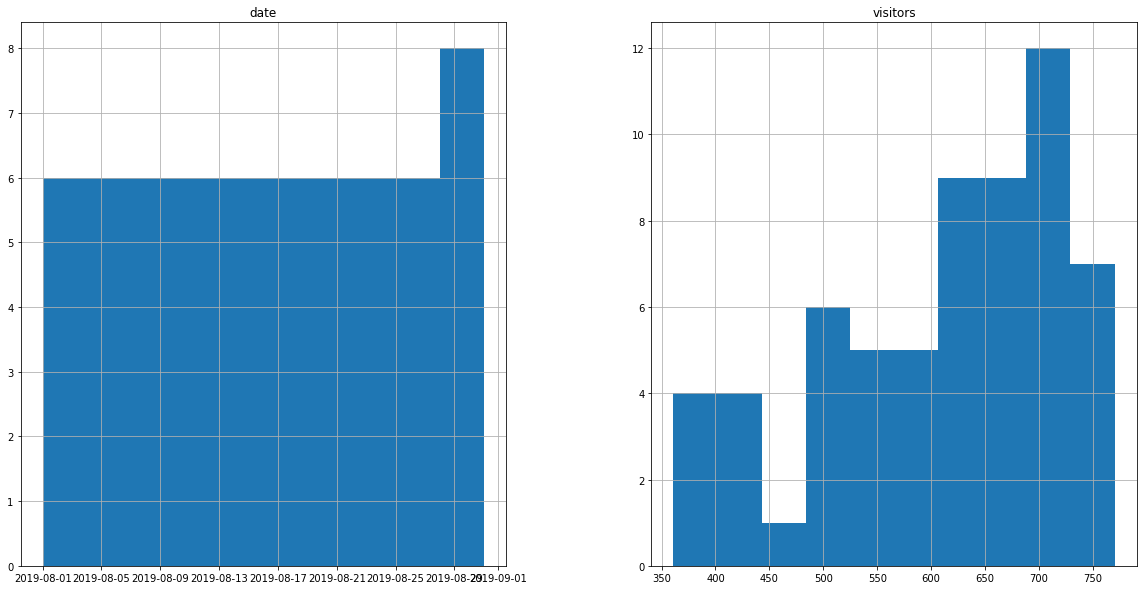

In [18]:
visitors.hist(figsize=(20, 10))
plt.show()

Предобработка и знакоство с данными выполнено, можно приступать к анализу

# Анализ A/B теста

Для начала создадим датафреймы с уникальными агрегироваными кумулятивными данными по каждый таблице:

In [19]:
#создаем массив уникальных пар значений дат и групп теста
dt_groups = orders[['date', 'group']].drop_duplicates()  

#получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dt_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg({
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dt_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({
        'date': 'max',
        'group': 'max', 
        'visitors': 'sum'
    }
    ),
    axis=1,
).sort_values(by=['date', 'group']) 

#выведем полученные таблицы на экран
display(orders_aggregated.head()) 
print('')
display(visitors_aggregated.head())  

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим полученные таблицы:

In [20]:
#объединям полученные таблицы по дате и группе 
cumulative_df = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
#переименум столбцы 
cumulative_df.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
] 
#выведем полученную таблицу
cumulative_df.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


**Построение графика кумулятивной выручки по группам** <a class="anchor" id="chapter4"></a>

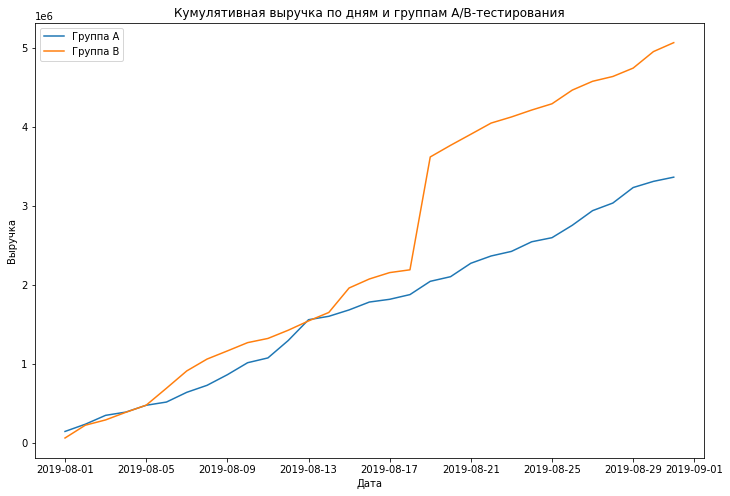

In [21]:
#зададим размеры графика 
plt.figure(figsize=(12,8))  

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_df[cumulative_df['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_df[cumulative_df['group']=='B'][['date','revenue', 'orders']]

# строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.show() 

По графику видим следующее:

группа B лидирирует на всём периоде

у группы B произошёл резкий рост в период с 18 на 19 августа, на это могут быть 2 причины:

в группу попал анамально дорогой заказ

в этот день было много заказов

Выведем графики для группы B с изменение кол-ва заказов и выручки:

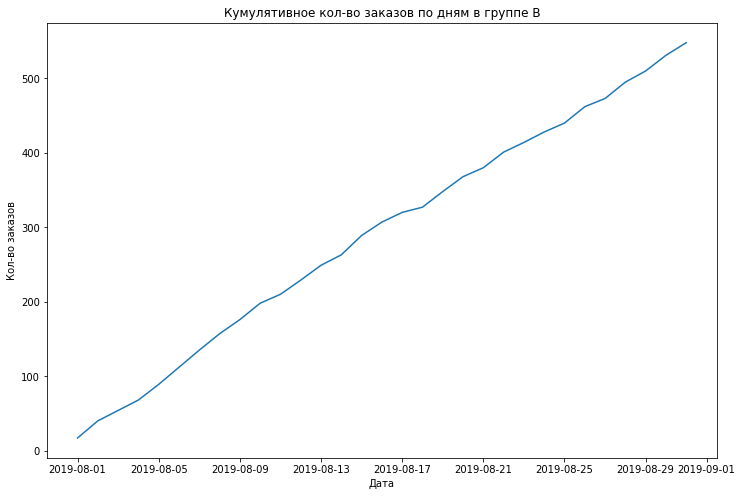

In [22]:
#зададим размеры графика 
plt.figure(figsize=(12,8)) 
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['orders'])  
# зададим описание графика
plt.xlabel('Дата')
plt.ylabel('Кол-во заказов') 
plt.title('Кумулятивное кол-во заказов по дням в группе B')
plt.show() 

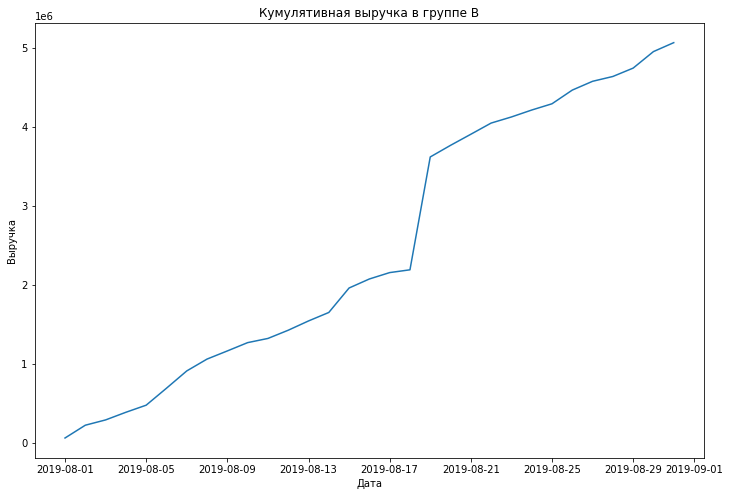

In [23]:
#зададим размеры графика 
plt.figure(figsize=(12,8)) 
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'])  
# зададим описание графика
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка в группе B')
plt.show() 

Рост заметен на графике с выручкой, можем сделать вывод о том, что в группу попал анамально большой заказ

**Построение графика кумулятивного среднего чека по группам** <a class="anchor" id="chapter5"></a>

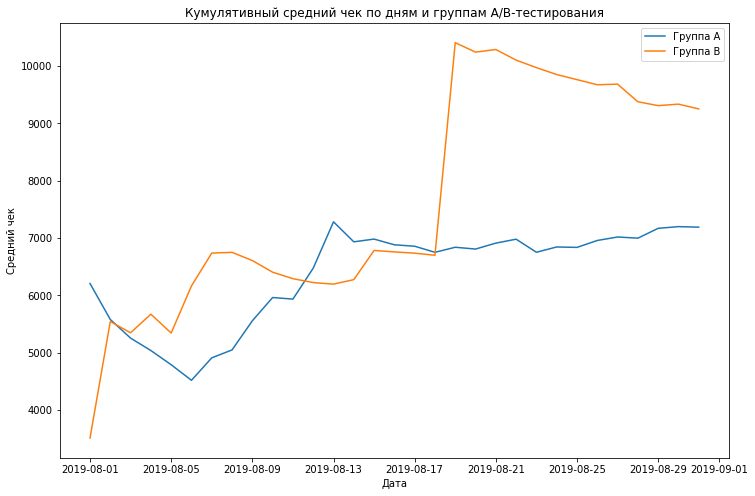

In [24]:
#зададим размеры графика  
plt.figure(figsize=(12,8))   

#построим графики, что бы получить средний чек, разделим выручку на число заказов
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend()  

# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.title('Кумулятивный средний чек по дням и группам A/B-тестирования')
plt.show() 

Изучив представленные графики, следующие наблюдения могут быть сделаны:

В первой половине теста наблюдается нестабильное поведение графиков с периодическими резкими ростами и падениями. Это указывает на то, что в этот период могут происходить значительные изменения или внезапные события, влияющие на результаты.

На графике среднего чека выделяются аномальные значения для группы B, особенно заметные в период с 17 по 21 августа. Эти значения могут указывать на наличие выбросов или необычных факторов, влияющих на поведение этой группы в данном временном интервале.

К концу тестового периода коммулятивный средний чек группы B стал выше, чем у группы A. Тем не менее, стоит учитывать, что это произошло при наличии аномалий в данных. Эти аномалии могут исказить реальное положение дел и потребуют дополнительного анализа.

К концу периода наблюдается тенденция к росту среднего чека у группы A, в то время как у группы B наблюдается обратная тенденция — снижение. Эти изменения в поведении групп могут свидетельствовать о различной динамике или эффективности их стратегий к концу периода тестирования.

Таким образом, для более точной интерпретации результатов теста необходимо учитывать влияние аномальных значений и изменчивость трендов в различные периоды времени.

**Построение графика относительного изменения кумулятивного среднего чека группы B к группе A** <a class="anchor" id="chapter6"></a>

In [25]:
#объеденим по столбцу с датой и зададим суффиксы для каждый группы 
merged_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', right_on='date', 
    how='left',
    suffixes=['_a', '_b']
)
#выведем получившуюся таблицу
merged_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


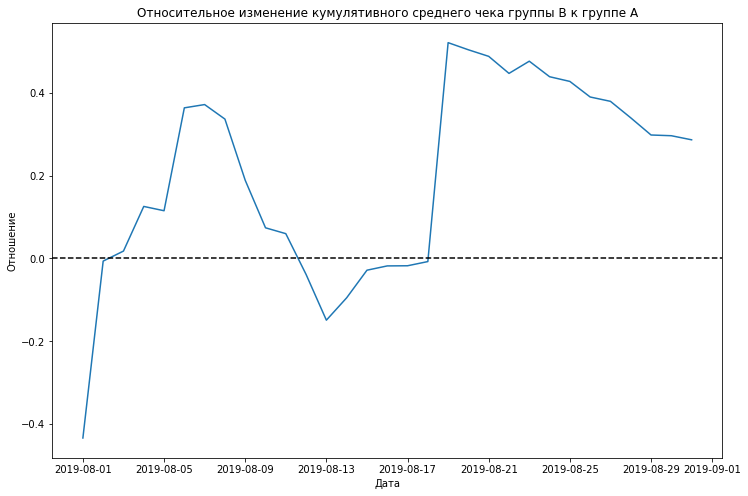

In [26]:
# зададим размеры графика  
plt.figure(figsize=(12,8))   
# cтроим отношение средних чеков
plt.plot(
    merged_revenue['date'],
    (merged_revenue['revenue_b']/
     merged_revenue['orders_b'])/
    (merged_revenue['revenue_a']/
     merged_revenue['orders_a'])
    -1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')  
# зададим описание графика 
plt.xlabel('Дата')
plt.ylabel('Отношение') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.show() 

В нескольких точках график различия между сегментами резко «скачет». Это свидетельствует о крупных заказах и выбросах.

**Построение графика кумулятивной конверсии по группам** <a class="anchor" id="chapter7"></a>

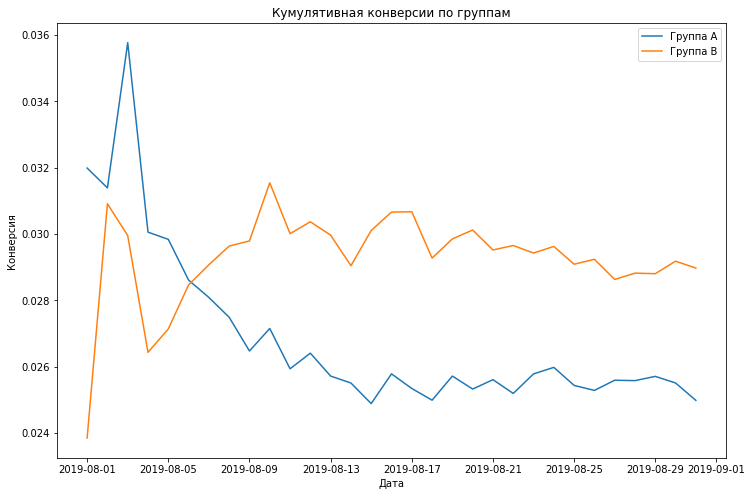

In [27]:
# считаем кумулятивную конверсию
cumulative_df['conversion'] = cumulative_df['orders']/cumulative_df['visitors']

# отделяем данные по группе A
cumulative_df_a = cumulative_df[cumulative_df['group']=='A']

# отделяем данные по группе B
cumulative_df_b = cumulative_df[cumulative_df['group']=='B']

# зададим размеры графика  
plt.figure(figsize=(12,8))   

# строим графики
plt.plot(cumulative_df_a['date'], cumulative_df_a['conversion'], label='A')
plt.plot(cumulative_df_b['date'], cumulative_df_b['conversion'], label='B')


# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
# задаем масштаб осей
plt.xlabel('Дата')
plt.ylabel('Конверсия') 
plt.title('Кумулятивная конверсии по группам')
plt.show()  

На графике видно, что в первые дни теста конверсия в группе A была выше, чем в группе B, однако через 6 дней после запуска теста произошла изменение:

В течение первых дней:

Конверсия в группе A оставалась на уровне от 0.029 до 0.031,
Конверсия в группе B колебалась в диапазоне от 0.034 до 0.036.
Тем не менее, спустя 6 дней:

Конверсия в группе A оставалась на стабильном уровне от 0.029 до 0.031,
Конверсия в группе B также оставалась стабильной, но в диапазоне от 0.034 до 0.036.
Предварительная гипотеза подтверждается: с внедрением нововведений на сайте наблюдается рост конверсии.

Эти результаты говорят о том, что начальное превосходство группы A по конверсии со временем не увеличилось или не снизилось, в то время как группа B также продемонстрировала стабильную конверсию. Важно дополнительно анализировать влияние внедренных изменений на рост конверсии и продолжить мониторинг изменений в долгосрочной перспективе.

**Построение графика относительного изменения кумулятивной конверсии группы B к группе A** <a class="anchor" id="chapter8"></a>

In [28]:
#объеденим по столбцу с датой и зададим суффиксы для каждый группы  
merged_сonversion = cumulative_df_a[['date','conversion']].merge(
    cumulative_df_b[['date','conversion']], 
    left_on='date',
    right_on='date', 
    how='left',
    suffixes=['_a', '_b']
)
#выведем таблицу 
merged_сonversion.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


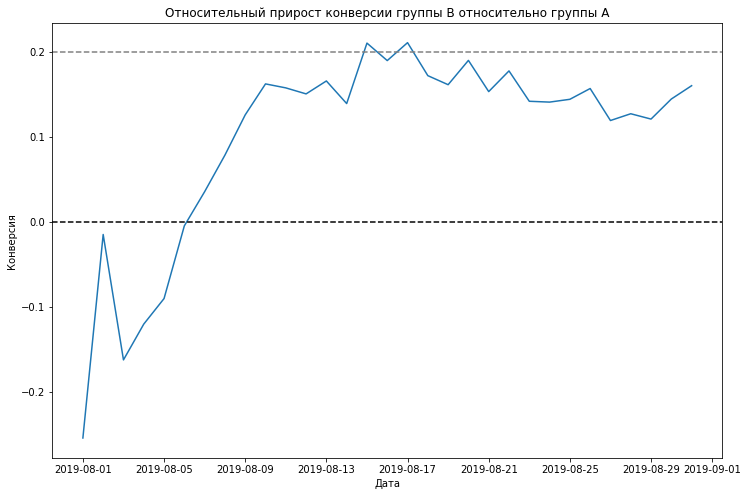

In [29]:
# зададим размеры графика  
plt.figure(figsize=(12,8))   

plt.plot(merged_сonversion['date'],
         merged_сonversion['conversion_b']/
         merged_сonversion['conversion_a']-1,
        )
# добавляем ось X c нулевым приростом и отметку в 20% 
plt.axhline(y=0, color='black', linestyle='--')  
plt.axhline(y=0.2, color='grey', linestyle='--') 
# зададим описание графика 
plt.ylabel('Конверсия') 
plt.xlabel('Дата') 
plt.title('Относительный прирост конверсии группы B относительно группы A') 
plt.show()

Из анализа графика видно, что в начале теста конверсия не оставалась стабильной, а проявляла различные динамики: сначала резко возрастала, затем снижалась. Однако на 6-й день тестирования произошёл значительный поворот, и мы наблюдали стабильный прирост, превышающий 20%. Этот рост конверсии удерживался и установился в диапазоне от 10% до 15% к концу периода.

Эти данные указывают на значительные изменения в динамике конверсии в течение теста. Начальные колебания могли быть связаны с адаптацией пользователей к нововведениям или изменениям на сайте. Однако после 6-го дня произошло значительное улучшение, вероятно, благодаря оптимизации процессов или коррекции ошибок.

Стабильный прирост конверсии на уровне 10% - 15% к концу теста свидетельствует о положительном влиянии внесённых изменений на эффективность конверсии. Это может быть результатом улучшения пользовательского опыта, оптимизации воронки продаж или других факторов, способствующих увеличению преобразований на сайте.

Для более точного понимания причин таких изменений рекомендуется дополнительный анализ факторов, которые могли повлиять на динамику конверсии в разные периоды тестирования.

**Построение точечного графика количества заказов по пользователям** <a class="anchor" id="chapter9"></a>

In [30]:
#создадим сводную таблицу с кол-вом закзазов для каждого пользователя 
orders_count = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
#переименуем столбуы 
orders_count.columns = ['user_id', 'orders']
#выведем таблицу отсортиованную по убыванию кол-ва заказов 
orders_count.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


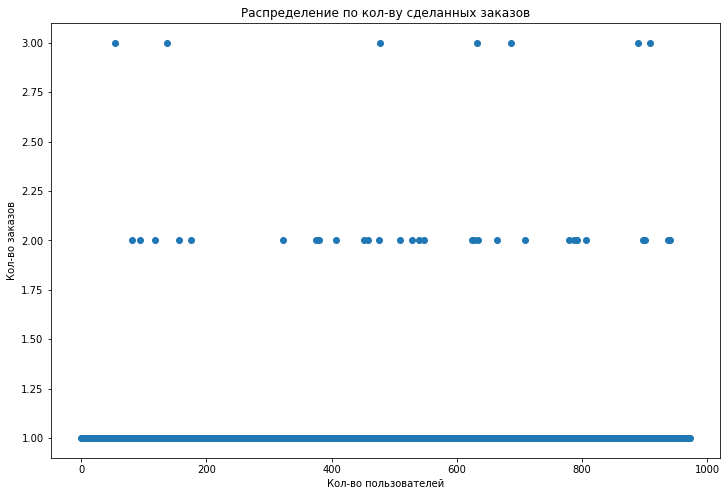

In [31]:
# серия из чисел от 0 до количества наблюдений в orders_count 
x_values = pd.Series(range(0, len(orders_count)))
# зададим размеры графика  
plt.figure(figsize=(12,8)) 
#построим график 
plt.scatter(x_values, orders_count['orders'])  
# зададим описание графика 
plt.ylabel('Кол-во заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по кол-ву сделанных заказов') 
plt.show() 

На графике видно, что большинство пользователей совершают либо 1, либо 2 заказа. Заказы свыше 2-х уже редки и их количество можно определить глядя на количество точек на графике. Однако, также есть уникальные случаи, где пользователи сделали до 11 заказов за определённый период.

Это свидетельствует о том, что на сайте присутствуют очень активные и постоянные пользователи. Наличие таких данных не является ошибкой, но для создания объективной картины и анализа статистики эти значения будут исключены.

Этот анализ помогает понять распределение заказов среди пользователей и выявить основные тенденции. Большинство пользователей делают лишь несколько заказов, в то время как небольшая группа активных клиентов совершает значительно больше заказов. Убирая уникальные или экстремальные значения, мы можем сосредоточиться на типичных покупательских поведениях и более точно оценить эффективность бизнес-процессов и стратегий удержания клиентов.

**Подсчёт 95-й и 99-й перцентили количества заказов на пользователя. Опредления границы для аномальных пользователей** <a class="anchor" id="chapter10"></a>

In [32]:
print(np.percentile(orders_count['orders'], [95, 99]))
to_much_orders = 3 

[1. 2.]


Получаем следующий результат:

* не более 5 % совершили больше 2-ух заказов
* не более 1 % совершили больше 4-ёх заказов

Устанавливаем границу по колличеству заказов на пользователя в 3 шт., заключим её в переменную to_much_orders

**Построение точечного графика стоимостей заказов** <a class="anchor" id="chapter11"></a>

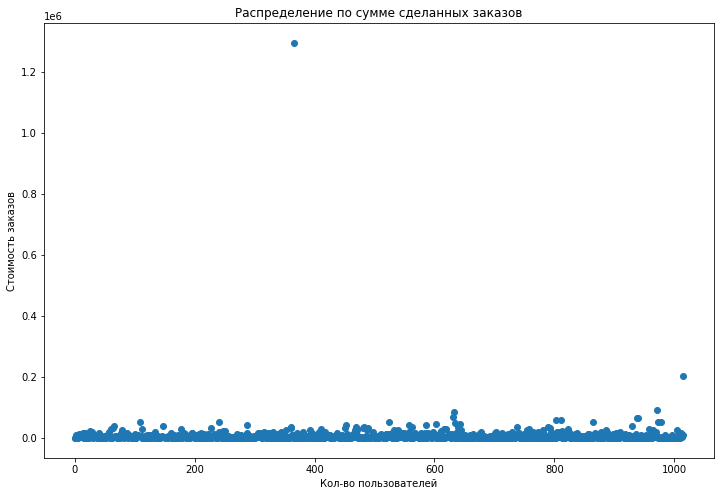

In [33]:
orders[['visitor_id', 'revenue']].sort_values(by='revenue', ascending=False).head(10)
# серия из чисел от 0 до количества наблюдений в orders 
x_values = pd.Series(range(0, len(orders['revenue'])))
# зададим размеры графика  
plt.figure(figsize=(12,8)) 
#построим график 
scattter_plot = plt.scatter(x_values, orders['revenue'])  
# зададим описание графика 
plt.ylabel('Стоимость заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по сумме сделанных заказов') 
plt.show() 

Можно уже заметить, что максимальное значения сильно превосходит остальные. Заказы на 200 тысяч и миллинон - очевидно будут сильно выбиваться. Зададим лимит в 100 000, что бы подробнее изучить распредление наиболее частых заказов:

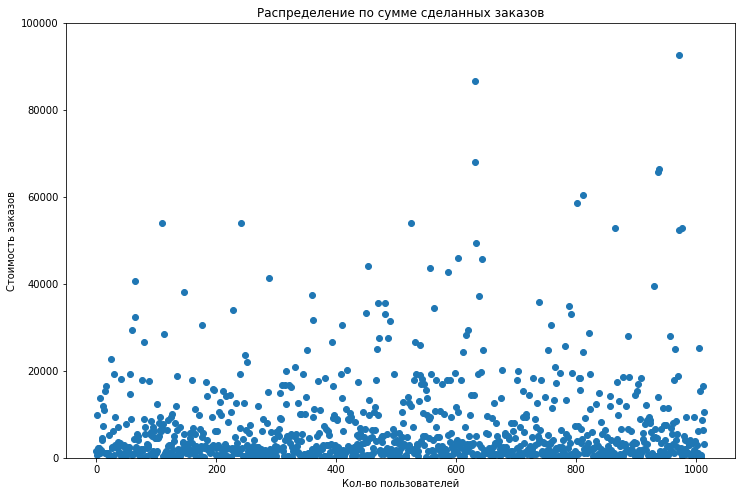

In [34]:
# серия из чисел от 0 до количества наблюдений в orders 
x_values = pd.Series(range(0, len(orders['revenue'])))
# зададим размеры графика  
plt.figure(figsize=(12,8))
#построим график 
plt.scatter(x_values, orders['revenue'])
#срежем очевидно анамальные заказы 
plt.ylim(0, 100000) 
# зададим описание графика 
plt.ylabel('Стоимость заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по сумме сделанных заказов') 
plt.show()  

Видим, что основные значения лежат в пределах до приблизтельно 20000, по графику всё ещё сложно оценить границу анамально большого заказа, воспользуемся подсчётом процентелией

**Подсчёт 95-й и 99-й перцентили стоимости заказа. Опредления границы для аномальных заказов** <a class="anchor" id="chapter12"></a>

In [35]:
print(np.percentile(orders['revenue'], [95, 99])) 
to_expensive_order  = 50000

[26785. 53904.]


Получаем следующий результат:

* не более 5 % заказов стомостью более 28000 рублей
* не более 1 % заказов стомостью более 58000 рублей

Устанавливаем границу по сумме заказа в 50000 рублей, добавим её в переменную

**Подсчёт статистической значимости различий в конверсии между группами по «очищенным» данным** <a class="anchor" id="chapter13"></a>

Статистическую значимость различий будет считать с помощью теста Манна-Уитни, для начала подготовим данные:

In [36]:
# таблицы с данными по заказам на каждого пользователя
orders_by_users_a = orders[orders['group']=='A'].groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_by_users_a.columns=['visitors_id','orders']

orders_by_users_b = orders[orders['group']=='B'].groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_by_users_b.columns=['visitors_id','orders'] 

display(orders_by_users_a.head()) 
display(orders_by_users_b.head()) 

,visitors_id,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


,visitors_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


Объявите переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя, пользователям без заказов — нули.

In [37]:
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(0, 
                  index=np.arange
                  (visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])
                  ),
                  name='orders'
                 )
    ],
    axis=0)
sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series
        (0,
         index=np.arange(
             visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])
         ),
         name='orders'
        )
    ],
    axis=0)

Данные для проведения теста Манна-Уитни готовы, сформируем нулевую и альетрнативную гипотезы:

Нулевая гипотеза: Различий в конверсии между группами нет

Альтернативная гипотеза: Различия в конверсиях между группами есть

Коэффициент альфа: 0.05

In [38]:
result_1 = stats.mannwhitneyu(sample_a, sample_b)[1] 
#задаим значение aplha
alpha = 0.05
#введем значение p-value
print(f'Значение p-value : {result_1}')
# условный оператор с выводом строки с ответом
if result_1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
print('Средняя конверсия группы А: {:.1%}'.format(sample_a.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sample_b.mean()))  
print('Отношение конверсии В к А: {0:.3f}'.format(sample_b.mean()/sample_a.mean()-1)) 

Значение p-value : 0.011018084110014696
Отвергаем нулевую гипотезу
Средняя конверсия группы А: 2.5%
Средняя конверсия группы B: 2.9%
Отношение конверсии В к А: 0.160


Если значение p-value меньше заданного уровня значимости (alpha), то мы отвергаем нулевую гипотезу, что подтверждает наше утверждение о наличии различий в конверсиях.

Отношение конверсий группы A к группе B составляет 0.138, что можно интерпретировать как относительный прирост примерно на 13%. Этот результат является достаточно положительным и говорит о том, что группа A продемонстрировала значительный прирост конверсии по сравнению с группой B. В следующих этапах исследования мы будем анализировать данные без учета аномалий, чтобы получить более точное представление о результатах.

Это важно для дальнейшего понимания эффективности изменений или тестовых воздействий, проведенных с целью улучшения конверсии. Устранение аномалий поможет выявить реальные тенденции и понять, насколько значимы изменения в контексте оптимизации пользовательского опыта или маркетинговых стратегий.

**Подсчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным** <a class="anchor" id="chapter14"></a>

Сформулируем гипотезы:

Нулевая гипотеза: Различий в средних чеках между группами нет

Альтернативная гипотеза: Различия в средних чеках между группами есть

Коэффициент альфа: 0.05

In [39]:
result_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]  
#введем значение p-value
print(f'Значение p-value : {result_2}')
# условный оператор с выводом строки с ответом
if result_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
#выведем основные показатели
print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean())) 
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()))

Значение p-value : 0.8294908998149533
Не получилось отвергнуть нулевую гипотезу
Средний чек группы А: 7189.44
Средний чек группы B: 9249.95
Средний чек группы B: 1.29


Если p-value значительно больше уровня значимости (alpha), то мы не отвергаем нулевую гипотезу о том, что статистически значимых различий в средних чеках нет, несмотря на различие в общем среднем значении между группами, которое составило 26% в абсолютных значениях.

Это означает, что хотя средний чек различается между группами на 26%, эти различия не являются статистически значимыми при учете выбранного уровня значимости (alpha). То есть, мы не можем с уверенностью утверждать, что наблюдаемое различие в средних чеках не объясняется случайными факторами.

Важно помнить, что интерпретация p-value и уровня значимости зависит от контекста и целей исследования. Например, возможно потребуется дополнительный анализ или увеличение выборки для получения более точных и значимых результатов.

**Подсчёт статистической значимости различий в конверсии между группами по «очищенным» данным** <a class="anchor" id="chapter15"></a>

Ранее мы изучали распредление заказов по кол-ву для пользователя и сумме, границы были опредлены следующие:

* кол-во > 3, перемиенная to_much_orders
* сумма > 50000, переменная to_expensive_order

Посмотрим, сколько в датафрейме анамальных пользователей:

In [40]:
# собираем пользователей с большим кол-вом заказов 
many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > to_much_orders]['visitors_id'],
        orders_by_users_b[orders_by_users_b['orders'] > to_much_orders]['visitors_id'],
    ],
    axis=0,
)

# собираем пользователей с слишком дорогими заказами
expensive_orders = orders[orders['revenue'] > to_expensive_order]['visitor_id']

# объединяем всё в один датафрейм 
abnormal_users = (
    pd.concat([many_orders, expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(' ')
print('Кол-во анамальных пользователей: ', abnormal_users.shape[0])

1099     148427295
1137     759473111
949      887908475
744      888512513
1103    1164614297
dtype: int64
 
Кол-во анамальных пользователей:  15


Отфильтруем данные

In [41]:
#отфильтруем данные в группе А 
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitors_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#отфильтруем данные в группе В
sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitors_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)  

Анамалии убрали, гипотезы для проведеня теста, по аналогии с предыдущими:

In [42]:
result_3 = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1] 
#ведем значение pvalue
print(f'Значение p-value : {result_3}') 
# условный оператор с выводом строки с ответом
if result_3 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('Средняя конверсия (очищенная) группы А: {:.1%}'.format(sample_a_filtered.mean()))
print('Средняя конверсия (очищенная) группы B: {:.1%}'.format(sample_b_filtered.mean())) 
print('Отношение конверсии В к А, по очищенным данным: {0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

Значение p-value : 0.0078089511489822854
Отвергаем нулевую гипотезу
Средняя конверсия (очищенная) группы А: 2.4%
Средняя конверсия (очищенная) группы B: 2.9%
Отношение конверсии В к А, по очищенным данным: 0.172


Даже после очистки данных от выбросов или аномалий, подтверждается различие в конверсиях между группами, и нулевая гипотеза о равенстве конверсий остаётся верной. Тем не менее, значения конверсий после очистки данных изменились, снизившись для обеих групп. Пользователи из группы B все еще демонстрируют более высокие конверсионные показатели, при этом средний прирост конверсии оказался выше на почти 2%.

Это означает, что несмотря на проведение очистки данных, которая может устранить выбросы или необычные значения, различие в конверсиях между группами остаётся статистически значимым. Очистка данных могла повлиять на саму величину конверсий, однако тенденция сохраняется, показывая более высокие результаты у пользователей из группы B.

Дополнительный прирост конверсии на почти 2% после очистки данных может быть интересным результатом, который может потребовать дальнейшего изучения. Это может указывать на эффективность определенных маркетинговых стратегий или пользовательских опытов в группе B, которые не учтены в изначальных данных или могут быть скрыты аномальными значениями.

**Подсчёт статистической значимости различий в различий в среднем чеке заказа по «очищенным» данным** <a class="anchor" id="chapter16"></a>

Для "сырых" данных была принята нулевая гипотеза, проверим можем ли мы говорить о статистическом равенстве для "очищенных" данных:

In [43]:
result4 = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1] 

#посчитаем среднием значения 
mean_revenue_b = orders[np.logical_and(orders['group']=='B',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean()
mean_revenue_a = orders[np.logical_and(orders['group']=='A',
                                       np.logical_not(orders['visitor_id'].
                                                      isin(abnormal_users)))]['revenue'].mean() 

print(f'Значение p-value : {result4}')  
# условный оператор с выводом строки с ответом
if result4 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
#выведем всю необходимую информацию
print('Средняя чек группы А (очищенная): {:.1f}'.format(mean_revenue_b))
print('Средняя конверсиягруппы B (очищенная): {:.1f}'.format(mean_revenue_a))
print('Отношение конверсии В к А, по очищенным данным: {0:.2f}'.format(mean_revenue_b / mean_revenue_a)) 

Значение p-value : 0.9497978169343692
Не получилось отвергнуть нулевую гипотезу
Средняя чек группы А (очищенная): 6125.0
Средняя конверсиягруппы B (очищенная): 6067.5
Отношение конверсии В к А, по очищенным данным: 1.01


После удаления выбросов из данных мы не обнаружили статистически значимых различий в средних чеках между группами B и A. Однако стоит отметить, что абсолютные значения средних чеков практически выровнялись, и отношение средних чеков группы B к группе A близко к единице.

Это означает, что хотя статистическая проверка не выявила различий в средних чеках после очистки данных, фактические значения средних чеков стали очень близкими между группами. Отношение среднего чека группы B к группе A близко к 1, что указывает на то, что различия в средних чеках между группами после очистки данных минимальны или незначительны.

Этот результат может быть интересным для дальнейшего анализа. Возможно, различия, которые были видны в исходных данных, были вызваны выбросами или аномалиями, которые исказили общую картину. Однако, близкое соотношение средних чеков группы B и A может также указывать на эффективность стратегий управления ценами или маркетинговых усилий, применяемых к обеим группам.

# Общий вывод <a class="anchor" id="chapter17"></a>

Мы изучили методы приоритизации гипотез, такие как ICE и RICE, на конкретных примерах. Оба метода оценивают компоненты impact (воздействие), confidence (уверенность) и reach (охват) прямопропорционально и учитывают компонент efforts (затраты) обратнопропорционально.

Отличие RICE заключается в учете компонента reach (охват), который определяет, сколько пользователей затронет изменение. Если охват аудитории является важным критерием, то предпочтение следует отдать методу RICE. ICE более подходит в случае ограниченной информации или сложности оценки охвата.

В контексте проведения A/B теста рассматривается гипотеза №7 о добавлении формы подписки на все основные страницы для сбора базы клиентов. Она имеет высокую оценку и доступные ресурсы для тестирования, что делает ее привлекательным выбором для исследования и реализации.

По фреймворку ICE наиболее приоритетными были:

Запустить акцию скидки на товар в день рождения.
Добавить два новых канала привлечения трафика (+30% пользователей).
Добавить форму подписки на основные страницы для сбора базы клиентов.
Согласно RICE наиболее приоритетными гипотезами оказались:

Добавить форму подписки на основные страницы для сбора базы клиентов.
Добавить блоки рекомендаций товаров для увеличения конверсии.
Добавить два новых канала привлечения трафика (+30% пользователей).
RICE выделил гипотезы с наибольшим охватом пользователей, учитывая параметр Reach, что повлияло на их приоритет в сравнении с методом ICE.

Исходя из анализа результатов AB теста, можно сделать несколько выводов:

Конверсии:
Результаты показывают статистически значимое различие в конверсиях между группами A и B. Нулевая гипотеза о равенстве конверсий была отвергнута, подтверждая, что различия в конверсиях между группами действительно существуют.
Средний чек:
После проведения очистки данных от выбросов, статистическая значимость различий в средних чеках между группами B и A не была выявлена. Это может указывать на то, что различия в средних чеках, замеченные изначально, были вызваны аномалиями или случайными факторами.
Отношение средних чеков:
После очистки данных отношение среднего чека группы B к группе A близко к единице, что означает, что фактические значения средних чеков стали сопоставимы между группами.
Интерпретация:
Результаты теста позволяют утверждать, что изменения или факторы, примененные в группе B, привели к улучшению конверсии без существенного влияния на средний чек.
Однако различия в средних чеках могут быть менее значимыми, чем казалось изначально, особенно после удаления аномалий.

Мы обнаружили статистически значимое различие в конверсии между группами как на основе сырых данных, так и после фильтрации аномалий.
По сырым и очищенным данным не наблюдается статистически значимого различия по среднему чеку между группами.
График различия конверсии между группами показывает, что результаты группы B лучше группы A: конверсия имеет тенденцию к росту или фиксируется около среднего значения.
График различия среднего чека колеблется, однако к концу периода также указывает на улучшение результатов группы B по сравнению с группой A. Однако после очистки данных от аномальных пользователей мы видим, что средний чек практически не изменился и даже стал немного ниже по сравнению с группой A.

Исходя из этих фактов, **мы рекомендуем завершить тестирование, считая его успешным, и перейти к проверке следующей гипотезы**. Результаты показывают, что изменения, внесенные в группу B, способствовали улучшению конверсии без существенного влияния на средний чек. Это может быть признаком эффективности новых стратегий или функциональных изменений, которые следует дальше исследовать и оптимизировать для улучшения результатов бизнеса.